In [196]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\'

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
#DR Methods
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
    #import umap
    #import pacmap
    #import trimap
#Clustering Methods
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch, estimate_bandwidth
    #import HDBSCAN
from scipy.spatial.distance import pdist, squareform

Data Preprocessing

In [198]:
#Load Data
df = pd.read_excel('C:\\Users\kterri3\Documents\Git Repositories\hw\CHE4230HW\che4230_hw\Project Stuff\RawData.xlsx')
# print(df)

In [199]:
#Fill empty data with mean values
df.describe()
df.shape
df.isnull().sum().sum()
df_mean = df.fillna(df.mean(), inplace= True)
df.isnull().sum().sum()
df_drop_dup = df.drop_duplicates()
df.fillna(0)

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1991,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,...,100.000000,57.399858,0,100.000000,41.244686,45.466296,0,30.171207,22.898173,100
1991,1992,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,...,100.000000,57.365210,0,100.000000,41.463254,45.413515,0,30.066018,26.035429,100
1992,1993,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,...,100.000000,57.415508,0,100.000000,41.700081,45.373462,0,30.117846,25.214501,100
1993,1994,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,...,100.000000,57.280676,0,100.000000,41.954073,45.361655,0,29.900523,25.175145,100


In [200]:
#df = df.drop(labels=[1])
#df.shape

In [201]:
x_train, x_test = train_test_split(df, test_size = 0.2, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.2, random_state=42)

print(len(x_train2))
print(len(x_test))
print(len(x_val))

1276
399
320


In [202]:
scaler = StandardScaler().fit(x_train2)
df_scaled = scaler.transform(x_train2)
df_scaled

array([[-1.67145683,  0.23967528, -0.76258687, ..., -0.4173564 ,
        -0.25319069,  0.        ],
       [-0.45492226, -0.03969446,  0.62022694, ...,  0.00707758,
        -0.01914925,  0.        ],
       [-1.46033703,  0.38006655,  0.02196928, ...,  0.26694504,
        -0.55188369,  0.        ],
       ...,
       [ 0.91043446, -0.07277319, -0.60448213, ..., -0.15173518,
        -1.30327117,  0.        ],
       [ 0.85678926,  1.08916544, -1.8745954 , ..., -0.71685255,
        -0.87620222,  0.        ],
       [-1.69741418,  0.14387656, -0.47997142, ..., -0.4244149 ,
         0.43516833,  0.        ]])

Using PCA with Clustering

Text(0.5, 1.0, 'Principal Component Analysis')

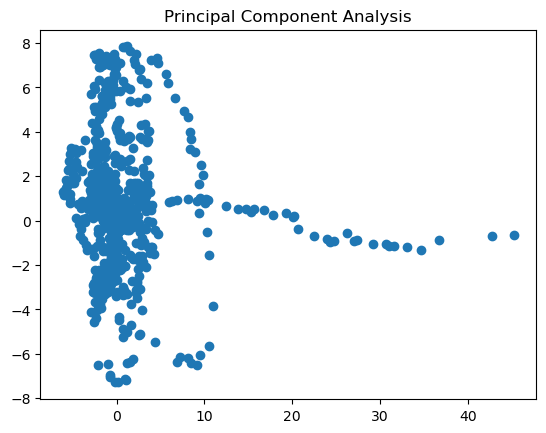

In [203]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:,0], df_pca[:,1])
plt.title("Principal Component Analysis")

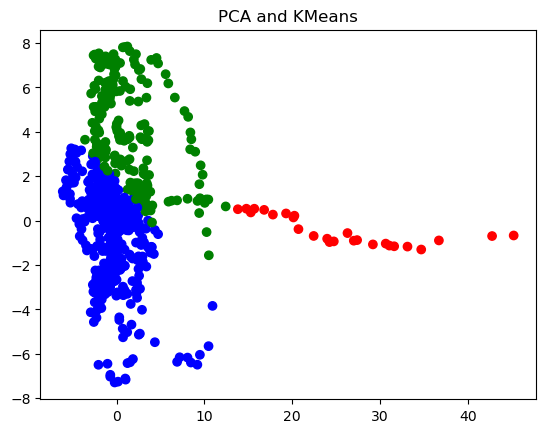

In [204]:
#PCA and KMEANS
pca_kmean_model = KMeans(n_clusters = 3)
pca_kmean_model.fit(df_pca)
pca_kmean_labels = pca_kmean_model.labels_
centroids = pca_kmean_model.cluster_centers_

# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[pca_kmean_labels[i]] for i in range(len(df_pca)) ]

plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
plt.title("PCA and KMeans")
plt.show()

Need to figure out meanshift and dbscan (or other methods)
[DBScan is usually a good method to use]

In [205]:
#PCA and MeanShift
#meanshift_model = MeanShift(bandwidth=0.1)
#meanshift_model.fit(df_pca)
#labels = meanshift_model.labels_
#centroids = meanshift_model.cluster_centers_

# colors for plotting
#colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
#features_colors = [ colors[labels[i]] for i in range(len(df_pca)) ]
#features_colors = [ colors[labels[i]] for i in range(len(df_pca)) ]

#plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
#plt.title("PCA and MeanShift")
#plt.show()

In [206]:
#PCA and DBScan
#dbscan_model = DBSCAN(eps=1, min_samples=3)
#dbscan_model.fit(df_pca)
#dbscan_labels = dbscan_model.labels_


# colors for plotting
#colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','yellow','purple','navy','lime','cyan','maroon','silver']
# assign a color to each features (note that we are using features as target)
#features_colors = [ colors[dbscan_labels[i]] for i in range(len(df_pca)) ]

#plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
#plt.title("PCA and DBScan")
#plt.show()

Using tSNE with Clustering 

c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


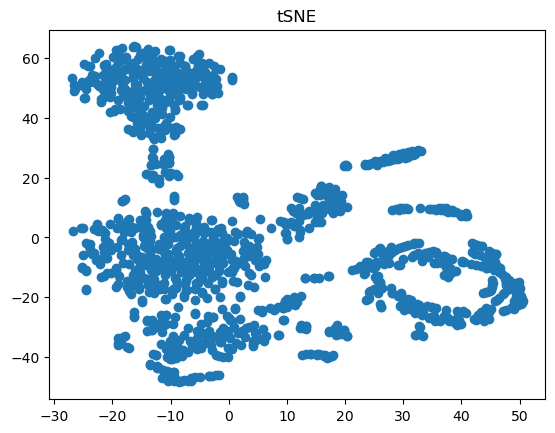

In [207]:
#using tSNE
tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

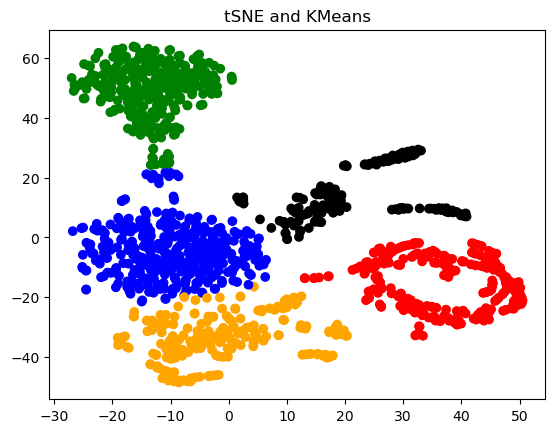

In [208]:
#tSNE and KMEANS
tsne_kmean_model = KMeans(n_clusters = 5)
tsne_kmean_model.fit(df_tsne)
tsne_kmean_labels = tsne_kmean_model.labels_
centroids = tsne_kmean_model.cluster_centers_

# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[tsne_kmean_labels[i]] for i in range(len(df_tsne)) ]

plt.scatter(df_tsne[:,0], df_tsne[:,1],c=features_colors,marker='o')
plt.title("tSNE and KMeans")
plt.show()

In [209]:
#tSNE and MeanShift

In [210]:
#tSNE and DBScan

ICA and Clustering

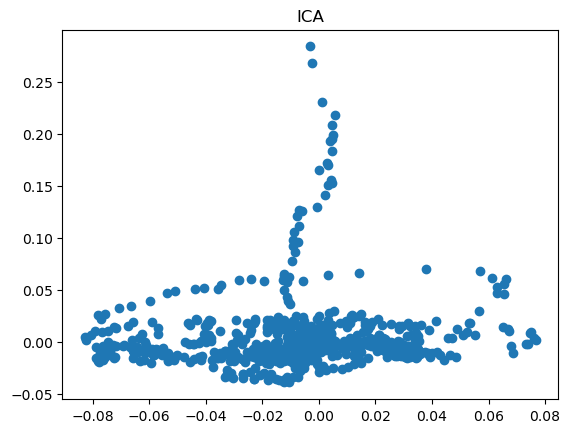

In [211]:
#using ICA
ica = FastICA(n_components = 2)
df_ica = ica.fit_transform(df_scaled)

plt.scatter(df_ica[:,0], df_ica[:,1])
plt.title("ICA")
plt.show()

In [212]:
#using UMAP
#reducer = umap.UMAP()
#data_UMAP = reducer.fit_transform(df_scaled)

In [213]:
#using PACMAP

In [214]:
#using TRIMAP

In [215]:
#using Spectral Embedding